In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
lab_enc=LabelEncoder()

In [5]:
df1=lab_enc.fit_transform(df['class'])
pd.Series(df1)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int32

In [6]:
df["class"]=df1

In [9]:
df1=lab_enc.fit_transform(df['cap-shape'])
pd.Series(df1)
df["cap-shape"]=df1

In [10]:
df1=lab_enc.fit_transform(df['cap-surface'])
pd.Series(df1)
df["cap-surface"]=df1

In [11]:
df1=lab_enc.fit_transform(df['cap-color'])
pd.Series(df1)
df["cap-color"]=df1

In [12]:
df1=lab_enc.fit_transform(df['bruises'])
pd.Series(df1)
df["bruises"]=df1

In [13]:
df1=lab_enc.fit_transform(df['odor'])
pd.Series(df1)
df["odor"]=df1

In [14]:
df1=lab_enc.fit_transform(df['gill-attachment'])
pd.Series(df1)
df["gill-attachment"]=df1

In [15]:
df1=lab_enc.fit_transform(df['gill-spacing'])
pd.Series(df1)
df["gill-spacing"]=df1

In [16]:
df1=lab_enc.fit_transform(df['gill-size'])
pd.Series(df1)
df["gill-size"]=df1

In [18]:
df1=lab_enc.fit_transform(df['gill-color'])
pd.Series(df1)
df["gill-color"]=df1

In [17]:
df1=lab_enc.fit_transform(df['stalk-shape'])
pd.Series(df1)
df["stalk-shape"]=df1

In [20]:
df1=lab_enc.fit_transform(df['stalk-root'])
pd.Series(df1)
df["stalk-root"]=df1

In [21]:
df1=lab_enc.fit_transform(df['stalk-surface-above-ring'])
pd.Series(df1)
df["stalk-surface-above-ring"]=df1

In [22]:
df1=lab_enc.fit_transform(df['stalk-surface-below-ring'])
pd.Series(df1)
df["stalk-surface-below-ring"]=df1

In [23]:
df1=lab_enc.fit_transform(df['stalk-color-above-ring'])
pd.Series(df1)
df["stalk-color-above-ring"]=df1

In [24]:
df1=lab_enc.fit_transform(df['stalk-color-below-ring'])
pd.Series(df1)
df["stalk-color-below-ring"]=df1

In [25]:
df1=lab_enc.fit_transform(df['veil-type'])
pd.Series(df1)
df["veil-type"]=df1

In [26]:
df1=lab_enc.fit_transform(df['veil-color'])
pd.Series(df1)
df["veil-color"]=df1

In [27]:
df1=lab_enc.fit_transform(df['ring-number'])
pd.Series(df1)
df["ring-number"]=df1

In [28]:
df1=lab_enc.fit_transform(df['ring-type'])
pd.Series(df1)
df["ring-type"]=df1

In [29]:
df1=lab_enc.fit_transform(df['spore-print-color'])
pd.Series(df1)
df["spore-print-color"]=df1

In [30]:
df1=lab_enc.fit_transform(df['population'])
pd.Series(df1)
df["population"]=df1

In [31]:
df1=lab_enc.fit_transform(df['habitat'])
pd.Series(df1)
df["habitat"]=df1

In [32]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [33]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [34]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [36]:
df_corr=df.corr().abs()

In [37]:
df_corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,0.031384,0.501530,0.093552,0.129200,0.348387,0.540024,0.530566,...,0.298801,0.154003,0.146730,NaN,0.145142,0.214366,0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,0.050454,0.048203,0.035374,0.021935,0.078865,0.013196,0.054050,0.006039,...,0.032591,0.031659,0.030390,NaN,0.072560,0.106534,0.025457,0.073416,0.063413,0.042221
cap-surface,0.178446,0.050454,1.000000,0.019402,0.070228,0.045233,0.034180,0.282306,0.208100,0.161017,...,0.107965,0.066050,0.068885,NaN,0.016603,0.026147,0.106407,0.230364,0.021555,0.163887
cap-color,0.031384,0.048203,0.019402,1.000000,0.000764,0.387121,0.041436,0.144259,0.169464,0.084659,...,0.047710,0.002364,0.008057,NaN,0.036130,0.005822,0.162513,0.293523,0.144770,0.033925
bruises,0.501530,0.035374,0.070228,0.000764,1.000000,0.061825,0.137359,0.299473,0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,0.285008,0.088137,0.075095
odor,0.093552,0.021935,0.045233,0.387121,0.061825,1.000000,0.059590,0.063936,0.310495,0.129213,...,0.061820,0.174532,0.169407,NaN,0.057747,0.111905,0.281387,0.469055,0.043623,0.026610
gill-attachment,0.129200,0.078865,0.034180,0.041436,0.137359,0.059590,1.000000,0.071489,0.108984,0.128567,...,0.116177,0.099299,0.097160,NaN,0.897518,0.093236,0.146689,0.029524,0.165575,0.030304
gill-spacing,0.348387,0.013196,0.282306,0.144259,0.299473,0.063936,0.071489,1.000000,0.108333,0.100193,...,0.213775,0.274574,0.253505,NaN,0.073363,0.243014,0.195897,0.047323,0.529253,0.154680
gill-size,0.540024,0.054050,0.208100,0.169464,0.369596,0.310495,0.108984,0.108333,1.000000,0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,0.171362,0.460872,0.622991,0.147682,0.161418
gill-color,0.530566,0.006039,0.161017,0.084659,0.527120,0.129213,0.128567,0.100193,0.516736,1.000000,...,0.257224,0.058299,0.074781,NaN,0.097583,0.096054,0.629398,0.416135,0.034090,0.202972


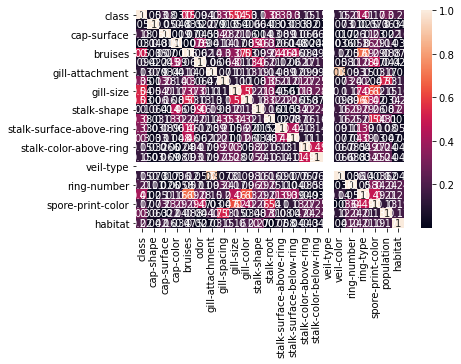

In [38]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [55]:
from scipy.stats import skew

0.07193224988597952
-0.24700637928120617
-0.5907497451740007
0.7068342913350331
0.3426869271575418
-0.08077478619378756
-5.975972685654995
1.83974847807238
0.8256444104849662
0.061398853411354266
-0.27129511258312494
0.9476773425430853
-1.0985365054493224
-0.7575632718648749
-1.8350954640494637
-1.7912626088095116
0.0
-6.945661192077107
2.701158403504732
-0.28996465324345516
0.5483245789238169
-1.4128347513176136
0.9853656933222494


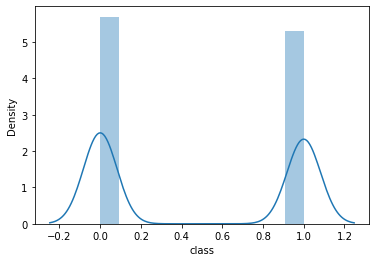

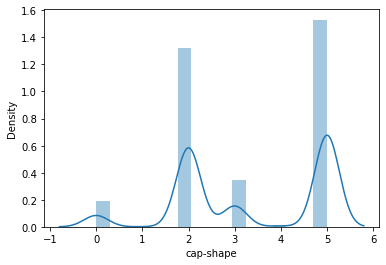

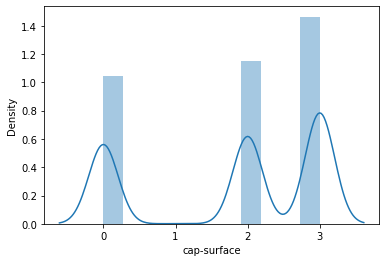

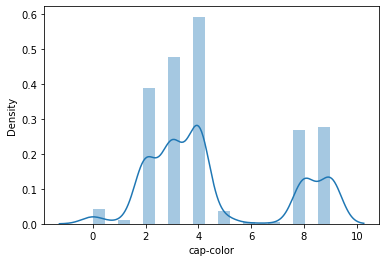

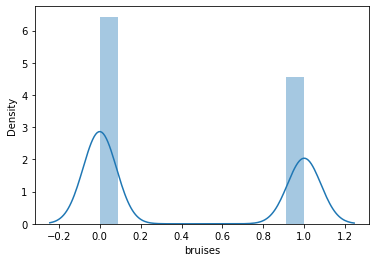

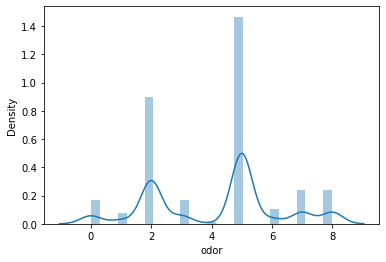

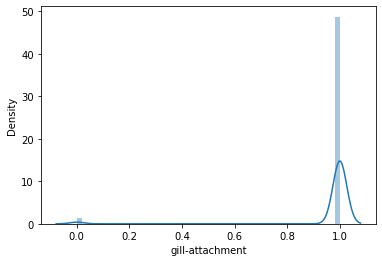

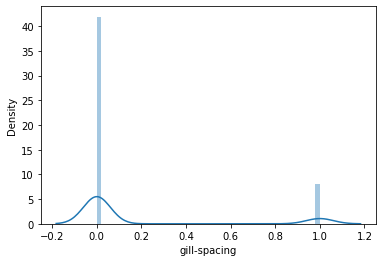

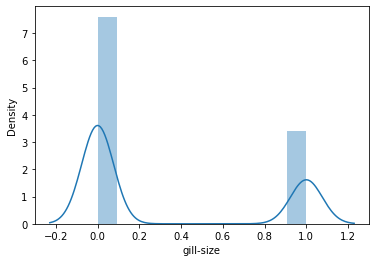

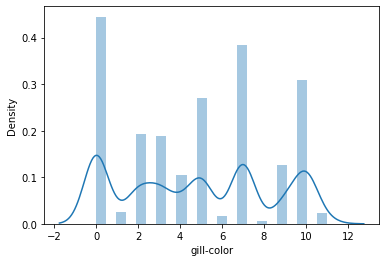

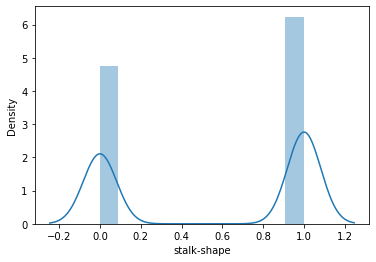

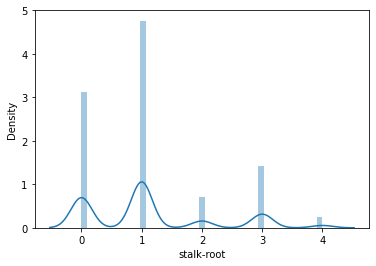

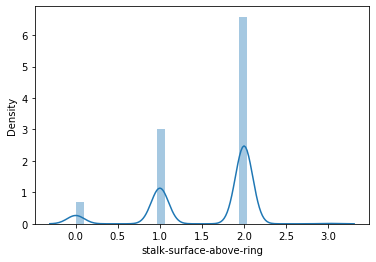

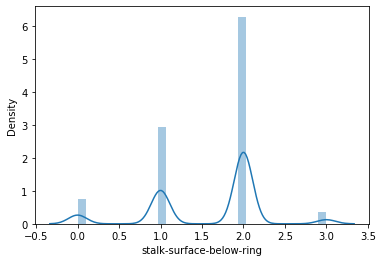

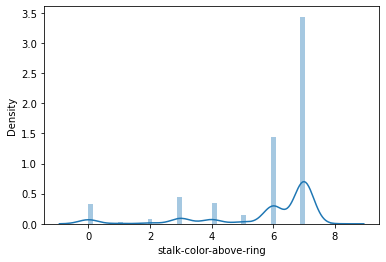

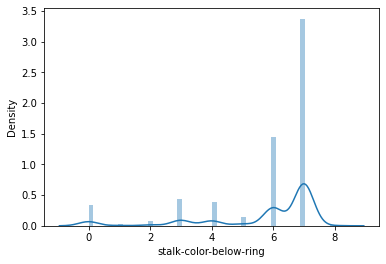

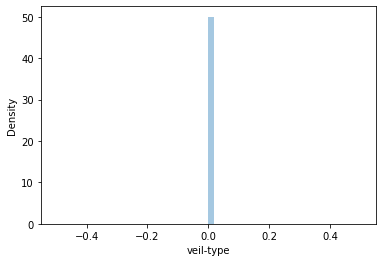

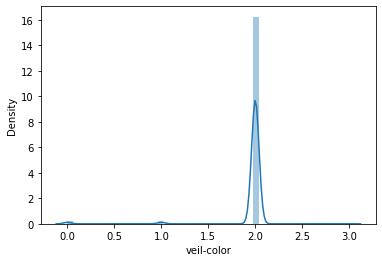

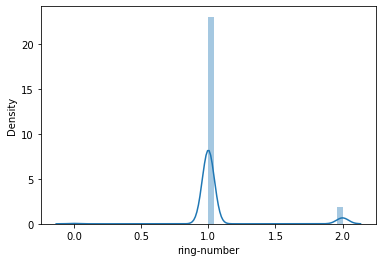

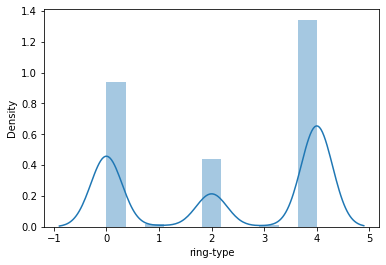

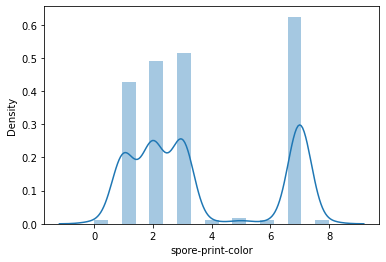

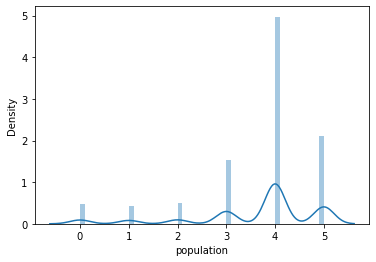

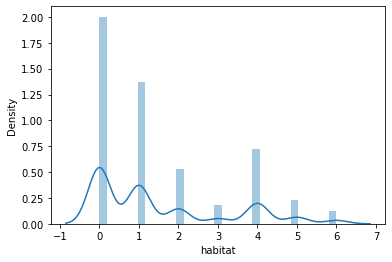

In [56]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [39]:
X=df.drop(columns='class')
Y=df["class"]

In [40]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [42]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
feature_name=list(X.columns)
class_name=list(Y_train.unique())
feature_name

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [44]:
clf.score(X_train,Y_train)
Y_pred=clf.predict(X_test)
clf.score(X_test,Y_test)


1.0

In [45]:
confusion_matrix(Y_test,Y_pred)

array([[1057,    0],
       [   0,  974]], dtype=int64)

In [47]:
grid_param={
    'criterion':['gini','Entropy'],
    'max_depth':(3,12,2),
    'min_samples_leaf':range(3,10,2),
    'min_samples_split':range(4,10,2)
}

In [48]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [49]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': (3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [50]:
best_parameters=grid_search.best_params_

In [51]:
print(best_parameters)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [52]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=3,min_samples_split=4)

In [53]:
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)
y_pred=clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

1.0